In [6]:
import kagglehub

# 데이터셋 다운로드
path = kagglehub.dataset_download("martinfrederiksen/danish-residential-housing-prices-1992-2024")

# 경로 출력
print("Path to dataset files:", path)

Path to dataset files: /Users/josuhyeon/.cache/kagglehub/datasets/martinfrederiksen/danish-residential-housing-prices-1992-2024/versions/3


In [7]:
import pandas as pd

# 정확한 파일 경로와 파일명 지정
file_path = "/Users/josuhyeon/.cache/kagglehub/datasets/martinfrederiksen/danish-residential-housing-prices-1992-2024/versions/3/DKHousingPricesSample100k.csv"

# 데이터 불러오기
df = pd.read_csv(file_path)


In [8]:
# 데이터 확인
print("데이터셋 미리보기:")
df.head()

데이터셋 미리보기:


,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN


In [9]:
print("데이터 정보:")
df.info()

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   date                                 100000 non-null  object 
 1   quarter                              100000 non-null  object 
 2   house_id                             100000 non-null  int64  
 3   house_type                           100000 non-null  object 
 4   sales_type                           100000 non-null  object 
 5   year_build                           100000 non-null  int64  
 6   purchase_price                       100000 non-null  int64  
 7   %_change_between_offer_and_purchase  100000 non-null  float64
 8   no_rooms                             100000 non-null  int64  
 9   sqm                                  100000 non-null  float64
 10  sqm_price                            100000 non-null  float64
 11  addres

In [10]:
print("결측값 확인:")
df.isnull().sum()

결측값 확인:


date                                    0
quarter                                 0
house_id                                0
house_type                              0
sales_type                              0
year_build                              0
purchase_price                          0
%_change_between_offer_and_purchase     0
no_rooms                                0
sqm                                     0
sqm_price                               0
address                                 0
zip_code                                0
city                                   11
area                                    0
region                                  0
nom_interest_rate%                      0
dk_ann_infl_rate%                      77
yield_on_mortgage_credit_bonds%        77
dtype: int64

In [11]:
print("컬럼 이름 확인:")
df.columns

컬럼 이름 확인:


Index(['date', 'quarter', 'house_id', 'house_type', 'sales_type', 'year_build',
       'purchase_price', '%_change_between_offer_and_purchase', 'no_rooms',
       'sqm', 'sqm_price', 'address', 'zip_code', 'city', 'area', 'region',
       'nom_interest_rate%', 'dk_ann_infl_rate%',
       'yield_on_mortgage_credit_bonds%'],
      dtype='object')

In [12]:
# 'city' 컬럼 결측값을 최빈값으로 채움
df.fillna({'city': df['city'].mode()[0]}, inplace=True)

In [13]:
# 'dk_ann_infl_rate%'와 'yield_on_mortgage_credit_bonds%' 컬럼의 결측값을 평균값으로 채우기
df['dk_ann_infl_rate%'] = df['dk_ann_infl_rate%'].fillna(df['dk_ann_infl_rate%'].mean())
df['yield_on_mortgage_credit_bonds%'] = df['yield_on_mortgage_credit_bonds%'].fillna(df['yield_on_mortgage_credit_bonds%'].mean())

In [14]:
# 불필요한 컬럼 제거
df = df.drop(['house_id', 'address', 'zip_code'], axis=1)

# 컬럼 제거 후 데이터프레임 확인
print("제거 후 데이터프레임 컬럼:")
df.columns

제거 후 데이터프레임 컬럼:


Index(['date', 'quarter', 'house_type', 'sales_type', 'year_build',
       'purchase_price', '%_change_between_offer_and_purchase', 'no_rooms',
       'sqm', 'sqm_price', 'city', 'area', 'region', 'nom_interest_rate%',
       'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%'],
      dtype='object')

In [15]:
# 범주형 컬럼의 고유값 개수 확인
categorical_columns = ['house_type', 'sales_type', 'city', 'area', 'region']

for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"컬럼 '{col}'의 고유값 개수: {unique_count}")

컬럼 'house_type'의 고유값 개수: 5
컬럼 'sales_type'의 고유값 개수: 4
컬럼 'city'의 고유값 개수: 607
컬럼 'area'의 고유값 개수: 8
컬럼 'region'의 고유값 개수: 4


In [16]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'city' 컬럼
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])

# One-Hot Encoding for 범주 수가 적은 컬럼들
df = pd.get_dummies(df, columns=['house_type', 'sales_type', 'area', 'region'])

# 결과 확인
print("인코딩 완료 후 데이터프레임:")
df.head()

인코딩 완료 후 데이터프레임:


,date,quarter,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,city,nom_interest_rate%,...,area_East & mid jutland,area_Fyn & islands,area_North Zealand,area_North jutland,area_Other islands,area_South jutland,region_Bornholm,region_Fyn & islands,region_Jutland,region_Zealand
0,2024-10-24,2024Q4,1997,6500000,-3.0,5,142.0,45774.650,471,3.1,...,False,False,False,False,False,False,False,False,False,True
1,2024-10-24,2024Q4,1885,3400000,0.0,2,46.0,73913.050,144,3.1,...,False,False,False,False,False,False,False,False,False,True
2,2024-10-23,2024Q4,1949,4550000,-4.0,4,112.0,40625.000,471,3.1,...,False,False,False,False,False,False,False,False,False,True
3,2024-10-23,2024Q4,2001,1630000,-12.0,4,186.0,8763.440,280,3.1,...,False,False,False,False,True,False,False,False,False,True
4,2024-10-22,2024Q4,1965,1975000,-10.0,3,82.0,24085.365,132,3.1,...,False,False,True,False,False,False,False,False,False,True


In [17]:
import datetime

# 현재 연도 계산
current_year = datetime.datetime.now().year

# 'house_age' 컬럼 추가
df['house_age'] = current_year - df['year_build']

print(df[['year_build', 'house_age']].head())

   year_build  house_age
0        1997         27
1        1885        139
2        1949         75
3        2001         23
4        1965         59


In [18]:
print("현재 데이터프레임 컬럼:")
print(df.columns)

현재 데이터프레임 컬럼:
Index(['date', 'quarter', 'year_build', 'purchase_price',
       '%_change_between_offer_and_purchase', 'no_rooms', 'sqm', 'sqm_price',
       'city', 'nom_interest_rate%', 'dk_ann_infl_rate%',
       'yield_on_mortgage_credit_bonds%', 'house_type_Apartment',
       'house_type_Farm', 'house_type_Summerhouse', 'house_type_Townhouse',
       'house_type_Villa', 'sales_type_auction', 'sales_type_family_sale',
       'sales_type_other_sale', 'sales_type_regular_sale', 'area_Bornholm',
       'area_Capital, Copenhagen', 'area_East & mid jutland',
       'area_Fyn & islands', 'area_North Zealand', 'area_North jutland',
       'area_Other islands', 'area_South jutland', 'region_Bornholm',
       'region_Fyn & islands', 'region_Jutland', 'region_Zealand',
       'house_age'],
      dtype='object')


In [19]:
# 'year_build' 컬럼 제거
df = df.drop('year_build', axis=1)

In [20]:
# 확인
print("컬럼 제거 후 데이터프레임:")
df.head()

컬럼 제거 후 데이터프레임:


,date,quarter,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,city,nom_interest_rate%,dk_ann_infl_rate%,...,area_Fyn & islands,area_North Zealand,area_North jutland,area_Other islands,area_South jutland,region_Bornholm,region_Fyn & islands,region_Jutland,region_Zealand,house_age
0,2024-10-24,2024Q4,6500000,-3.0,5,142.0,45774.650,471,3.1,1.927025,...,False,False,False,False,False,False,False,False,True,27
1,2024-10-24,2024Q4,3400000,0.0,2,46.0,73913.050,144,3.1,1.927025,...,False,False,False,False,False,False,False,False,True,139
2,2024-10-23,2024Q4,4550000,-4.0,4,112.0,40625.000,471,3.1,1.927025,...,False,False,False,False,False,False,False,False,True,75
3,2024-10-23,2024Q4,1630000,-12.0,4,186.0,8763.440,280,3.1,1.927025,...,False,False,False,True,False,False,False,False,True,23
4,2024-10-22,2024Q4,1975000,-10.0,3,82.0,24085.365,132,3.1,1.927025,...,False,True,False,False,False,False,False,False,True,59


In [21]:
print(df.dtypes)

date                                    object
quarter                                 object
purchase_price                           int64
%_change_between_offer_and_purchase    float64
no_rooms                                 int64
sqm                                    float64
sqm_price                              float64
city                                     int64
nom_interest_rate%                     float64
dk_ann_infl_rate%                      float64
yield_on_mortgage_credit_bonds%        float64
house_type_Apartment                      bool
house_type_Farm                           bool
house_type_Summerhouse                    bool
house_type_Townhouse                      bool
house_type_Villa                          bool
sales_type_auction                        bool
sales_type_family_sale                    bool
sales_type_other_sale                     bool
sales_type_regular_sale                   bool
area_Bornholm                             bool
area_Capital,

In [22]:
# 'date'를 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

In [23]:
# 'year'와 'month' 컬럼 생성
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [24]:
# 'date' 컬럼 삭제 (원하면)
df = df.drop('date', axis=1)

In [25]:
# 'quarter'를 숫자형으로 변환
df['quarter'] = df['quarter'].str.extract('Q([0-9])').astype(int)

In [26]:
# 데이터 요약 통계 확인
print("데이터 요약 통계:")
print(df.describe())

# bool 타입 컬럼의 True/False 비율 확인
bool_columns = df.select_dtypes(include='bool').columns
print("\nbool 컬럼별 True 비율:")
for col in bool_columns:
    print(f"{col}: {df[col].mean():.4f}")

데이터 요약 통계:
             quarter  purchase_price  %_change_between_offer_and_purchase  \
count  100000.000000    1.000000e+05                        100000.000000   
mean        2.492160    1.925992e+06                            -2.084740   
std         1.091389    1.777832e+06                             4.852926   
min         1.000000    2.502000e+05                           -49.000000   
25%         2.000000    8.000000e+05                            -3.000000   
50%         2.000000    1.400000e+06                             0.000000   
75%         3.000000    2.450000e+06                             0.000000   
max         4.000000    4.595500e+07                            49.000000   

            no_rooms            sqm      sqm_price           city  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        4.375790     129.387820   16406.648074     305.791560   
std         1.661686      57.170619   13655.184405     166.838731   
min         1.00000

In [27]:
# 삭제할 컬럼 리스트
columns_to_drop = [
    'sales_type_auction', 'area_Bornholm', 'region_Bornholm', 'sales_type_other_sale',
    'quarter', 'year'
]

In [28]:
# area_* 컬럼 제거
columns_to_drop += [col for col in df.columns if col.startswith('area_')]

In [29]:
# 컬럼 삭제
df = df.drop(columns=columns_to_drop)

In [30]:
# 확인
print("컬럼 삭제 후 데이터프레임:")
df.columns

컬럼 삭제 후 데이터프레임:


Index(['purchase_price', '%_change_between_offer_and_purchase', 'no_rooms',
       'sqm', 'sqm_price', 'city', 'nom_interest_rate%', 'dk_ann_infl_rate%',
       'yield_on_mortgage_credit_bonds%', 'house_type_Apartment',
       'house_type_Farm', 'house_type_Summerhouse', 'house_type_Townhouse',
       'house_type_Villa', 'sales_type_family_sale', 'sales_type_regular_sale',
       'region_Fyn & islands', 'region_Jutland', 'region_Zealand', 'house_age',
       'month'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler

# 스케일링 대상 컬럼 선택
scale_columns = [
    '%_change_between_offer_and_purchase', 'no_rooms', 'sqm', 'sqm_price',
    'nom_interest_rate%', 'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%', 'house_age'
]

# StandardScaler 객체 생성 및 스케일링 적용
scaler = StandardScaler()
df[scale_columns] = scaler.fit_transform(df[scale_columns])

# 결과 확인
print("스케일링 후 데이터프레임:")
df.head()

스케일링 후 데이터프레임:


,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,city,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%,house_type_Apartment,...,house_type_Summerhouse,house_type_Townhouse,house_type_Villa,sales_type_family_sale,sales_type_regular_sale,region_Fyn & islands,region_Jutland,region_Zealand,house_age,month
0,6500000,-0.188601,0.375651,0.220607,2.150696,471,0.693697,-1.355748e-16,0.0,False,...,False,False,True,False,True,False,False,True,-0.917251,10
1,3400000,0.429586,-1.429754,-1.458586,4.211345,144,0.693697,-1.355748e-16,0.0,True,...,False,False,False,False,True,False,False,True,1.533334,10
2,4550000,-0.394663,-0.226151,-0.304141,1.773573,471,0.693697,-1.355748e-16,0.0,False,...,False,False,True,False,True,False,False,True,0.133000,10
3,1630000,-2.043161,-0.226151,0.990237,-0.559732,280,0.693697,-1.355748e-16,0.0,False,...,False,False,True,False,True,False,False,True,-1.004772,10
4,1975000,-1.631036,-0.827953,-0.828888,0.562333,132,0.693697,-1.355748e-16,0.0,True,...,False,False,False,False,True,False,False,True,-0.217084,10


In [32]:
from sklearn.model_selection import train_test_split

# 입력 변수(X)와 타겟 변수(y) 분리
X = df.drop('purchase_price', axis=1)  # 타겟 변수를 제외한 나머지 컬럼
y = df['purchase_price']               # 타겟 변수 (주택 가격)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할 결과 확인
print("학습 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)

학습 데이터 크기: (80000, 20) (80000,)
테스트 데이터 크기: (20000, 20) (20000,)


In [33]:
#지금부터 선형회귀'를' 할거예요
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [34]:
# 모델 생성
linear_model = LinearRegression()

In [35]:
# 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# 예측
y_pred = linear_model.predict(X_test)

In [37]:
# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [38]:
# 결과 출력
print("선형 회귀 성능:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

선형 회귀 성능:
RMSE: 791257.68
R² Score: 0.8008


In [39]:
#지금부터는 릿지회귀'를' 할거예요
from sklearn.linear_model import Ridge

In [40]:
# 모델 생성
ridge_model = Ridge(alpha=1.0)  # alpha: 규제 강도 조절

In [41]:
# 모델 학습
ridge_model.fit(X_train, y_train)

Ridge()

In [42]:
# 예측
y_pred_ridge = ridge_model.predict(X_test)

In [43]:
# 평가 지표 계산
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [44]:
# 결과 출력
print("릿지 회귀 성능:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.4f}")

릿지 회귀 성능:
RMSE: 791257.49
R² Score: 0.8008


In [45]:
# 지금부터는 라쏘회귀'를' 할 거예요
from sklearn.linear_model import Lasso

In [46]:
# 모델 생성
lasso_model = Lasso(alpha=0.01, max_iter=50000)  # alpha: 규제 강도 조절

In [47]:
# 모델 학습
lasso_model.fit(X_train, y_train)

/Users/josuhyeon/homework/env1/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.360e+14, tolerance: 2.532e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01, max_iter=50000)

In [48]:
# 예측
y_pred_lasso = lasso_model.predict(X_test)

In [49]:
# 평가 지표 계산
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [50]:
# 결과 출력
print("라쏘 회귀 성능:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.4f}")

라쏘 회귀 성능:
RMSE: 791257.68
R² Score: 0.8008


In [51]:
# 이제 랜덤포레스트를 할거예요
from sklearn.ensemble import RandomForestRegressor

In [52]:
# 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [53]:
# 학습
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# 예측
y_pred_rf = rf_model.predict(X_test)

In [55]:
# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤 포레스트 회귀 성능:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

랜덤 포레스트 회귀 성능:
RMSE: 108926.47
R² Score: 0.9962


In [56]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 부호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

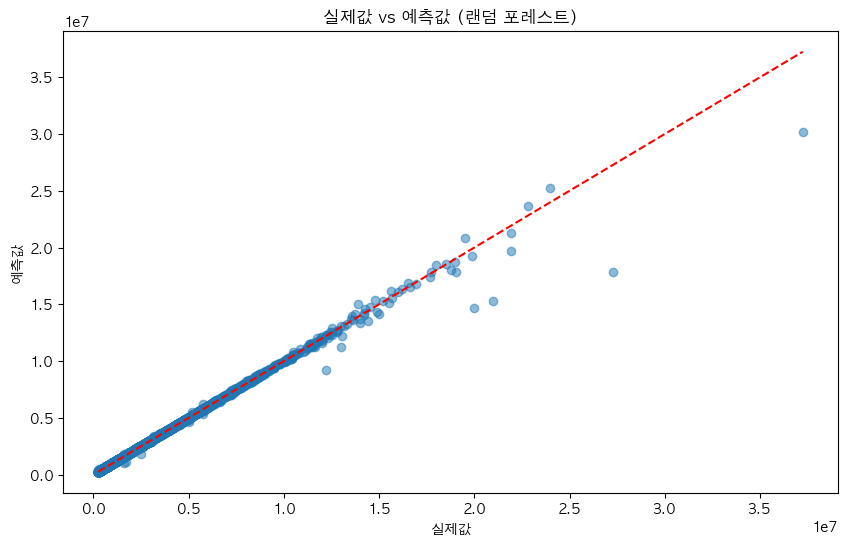

In [57]:
# 모델 평가 및 시각화를 할거예요
import matplotlib.pyplot as plt

# 실제값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값 vs 예측값 (랜덤 포레스트)")
plt.show()

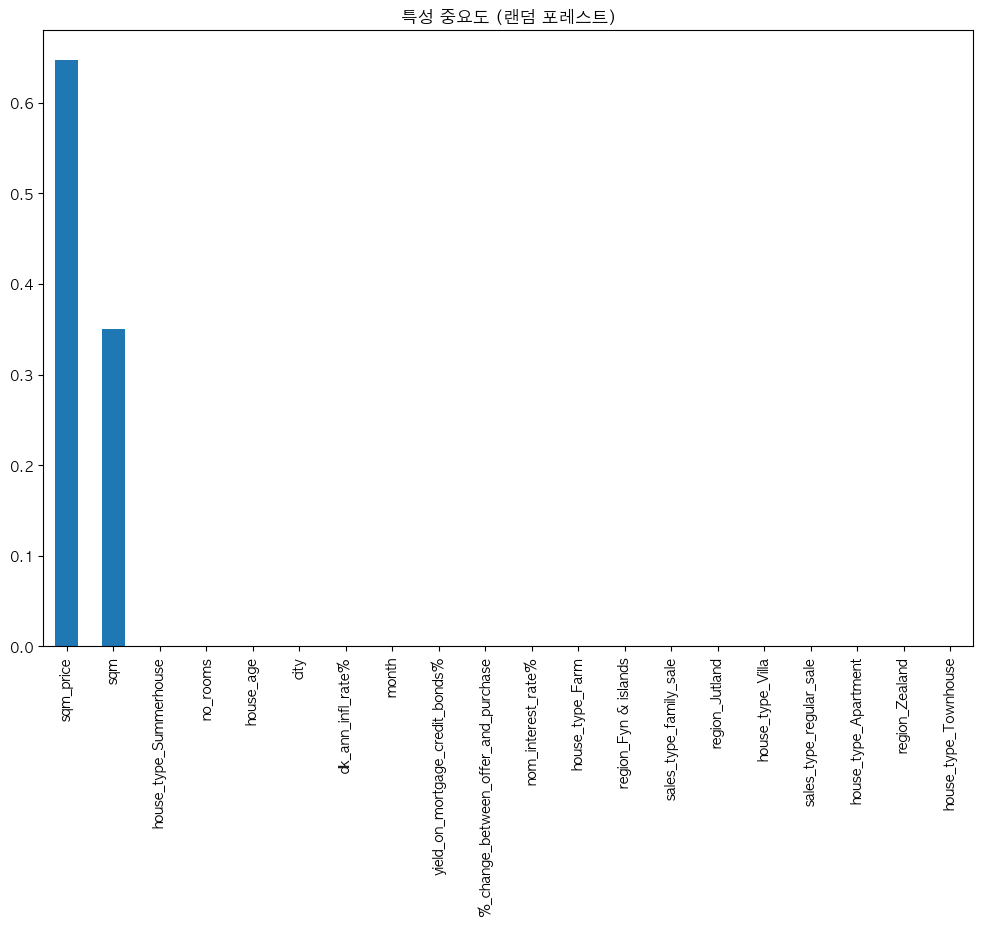

In [58]:
# 특성 중요도 시각화
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title("특성 중요도 (랜덤 포레스트)")
plt.show()

In [59]:
# XGBoost 회귀 모델 적용
from xgboost import XGBRegressor

In [60]:
# XGBoost 모델 생성
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [61]:
# 모델 학습
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [62]:
# 예측
y_pred_xgb = xgb_model.predict(X_test)

In [63]:
# 평가 지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 결과 출력
print("XGBoost 회귀 성능:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")

XGBoost 회귀 성능:
RMSE: 144455.42
R² Score: 0.9934


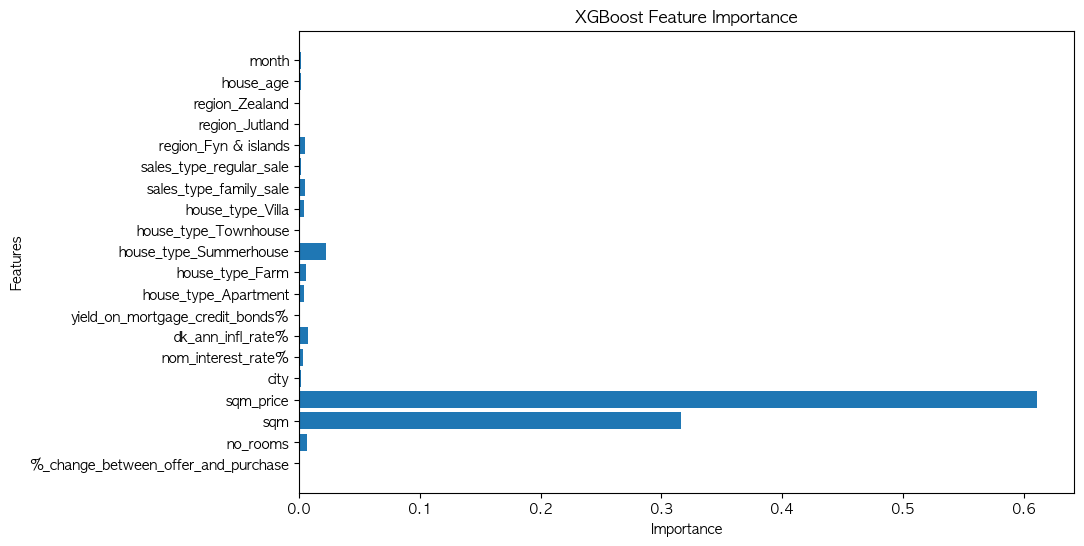

In [64]:
# Feature 중요도 시각화
importance = xgb_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [67]:
# 중요도가 낮은 특성 제거
low_importance_features = ['month', 'house_age', 'region_Zealand', 'sales_type_regular_sale']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# 모델 학습
xgb_model.fit(X_train_reduced, y_train)

# 예측 (테스트 데이터 사용)
y_pred_xgb = xgb_model.predict(X_test_reduced)

# 평가 지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 결과 출력
print("XGBoost 회귀 성능:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")

XGBoost 회귀 성능:
RMSE: 141913.27
R² Score: 0.9936


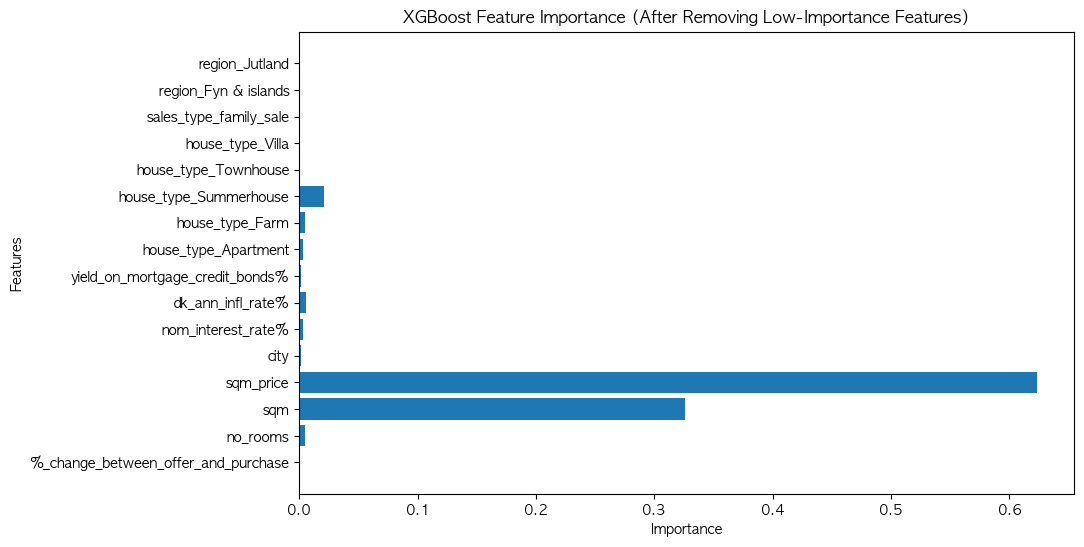

In [68]:
# 변경된 Feature Importance 시각화
importance = xgb_model.feature_importances_
features = X_train_reduced.columns  # 제거된 특성이 반영된 상태

plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.title("XGBoost Feature Importance (After Removing Low-Importance Features)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [69]:
# 중요도가 낮은 특성 찾기
threshold = 0.01
low_importance_features = [feature for feature, importance in zip(features, importance) if importance <= threshold]

print("중요도가 낮은 특성:", low_importance_features)

# 중요도가 낮은 특성 제거
X_train_final = X_train_reduced.drop(columns=low_importance_features)
X_test_final = X_test_reduced.drop(columns=low_importance_features)

# 모델 재학습
xgb_model.fit(X_train_final, y_train)

# 예측 및 성능 평가
y_pred_final = xgb_model.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_final)

print("XGBoost 최종 성능:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

중요도가 낮은 특성: ['%_change_between_offer_and_purchase', 'no_rooms', 'city', 'nom_interest_rate%', 'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%', 'house_type_Apartment', 'house_type_Farm', 'house_type_Townhouse', 'house_type_Villa', 'sales_type_family_sale', 'region_Fyn & islands', 'region_Jutland']
XGBoost 최종 성능:
RMSE: 160542.92
R² Score: 0.9918


In [71]:
# 일부 특성 복원
features_to_keep = ['no_rooms', 'city', 'yield_on_mortgage_credit_bonds%']
X_train_partial = X_train_reduced[features_to_keep + list(X_train_final.columns)]
X_test_partial = X_test_reduced[features_to_keep + list(X_test_final.columns)]

In [74]:
# XGBoost 모델 재학습 (복원된 데이터 사용)
xgb_model.fit(X_train_partial, y_train)

# 예측
y_pred_partial = xgb_model.predict(X_test_partial)

# 성능 평가
mse_partial = mean_squared_error(y_test, y_pred_partial)
rmse_partial = np.sqrt(mse_partial)
r2_partial = r2_score(y_test, y_pred_partial)

print("복원된 특성 사용 후 XGBoost 성능:")
print(f"RMSE: {rmse_partial:.2f}")
print(f"R² Score: {r2_partial:.4f}")

복원된 특성 사용 후 XGBoost 성능:
RMSE: 137436.97
R² Score: 0.9940


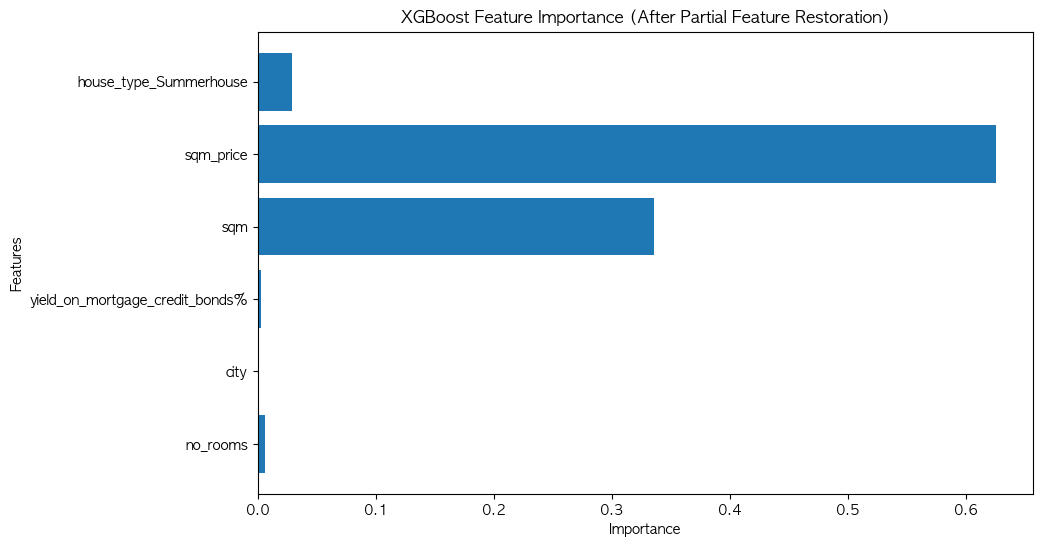

In [75]:
# 최종 Feature Importance 시각화
final_importance_partial = xgb_model.feature_importances_
final_features_partial = X_train_partial.columns

plt.figure(figsize=(10, 6))
plt.barh(final_features_partial, final_importance_partial)
plt.title("XGBoost Feature Importance (After Partial Feature Restoration)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()